<a href="https://colab.research.google.com/github/RossPereira/EvitarSaidaColaboradores/blob/main/EvitarSaidaColabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problema de negócio:**


   Estamos com vários funcionários se desligando da empresa, isso aumentou consideravelmente nossos custos com contratação e treinamento, precisamos de uma solução para poder evitar a saída dos antigos funcionários e prologar a permanencia dos novos.

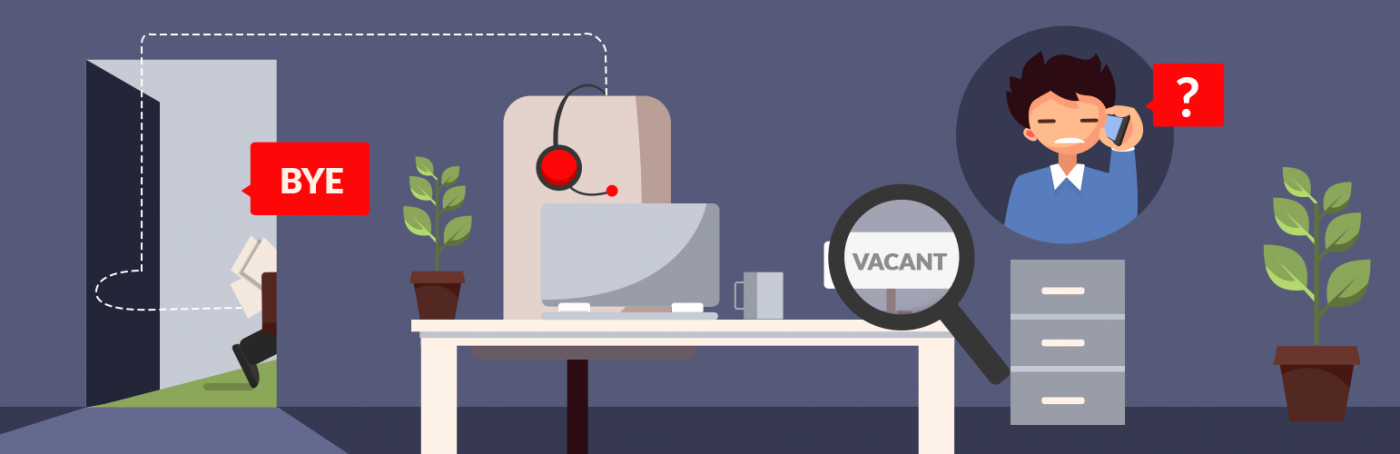

## **CARREGANDO DADOS, BIBLIOTECAS, ANÁLISES DESCRITIVAS E ESTATÍSTICAS**

**Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Base Disponivel em: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

**Descrição de Algumas Varáveis:**


*   Age: Idade do Colaborador
*   Attrition: Se o Colaborador saiu ou não
*   Business Travel: Frequencia de Viagem pela empresa
*   Distance From Home: Distância de casa até o trabalho
*   Education: Grau de educação do colaborador
*   Education Field: Área de atuação do colaborador
*   Enviroment Satisfaction: O quanto o colaborador está satisfeito com a Empresa (voto feito pelo próprio colab)
*   OverTime: Se o Colaborador faz horas extras



**Dicionário de Algumas Variáveis:**

Education:
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement & JobSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High

PerformanceRating:
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'


In [2]:
baseLink = "https://raw.githubusercontent.com/RossPereira/EvitarSaidaColaboradores/main/Bases/BaseBruta.csv"
base = pd.read_csv(baseLink)
pd.set_option('display.max_columns', None)

totalColabsSairam = len(base[base['Attrition'] == 'Yes'])

In [3]:
base.shape

(1470, 35)

Informações sobre as Colunas

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
base.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Verificando a distribuição dos dados na base

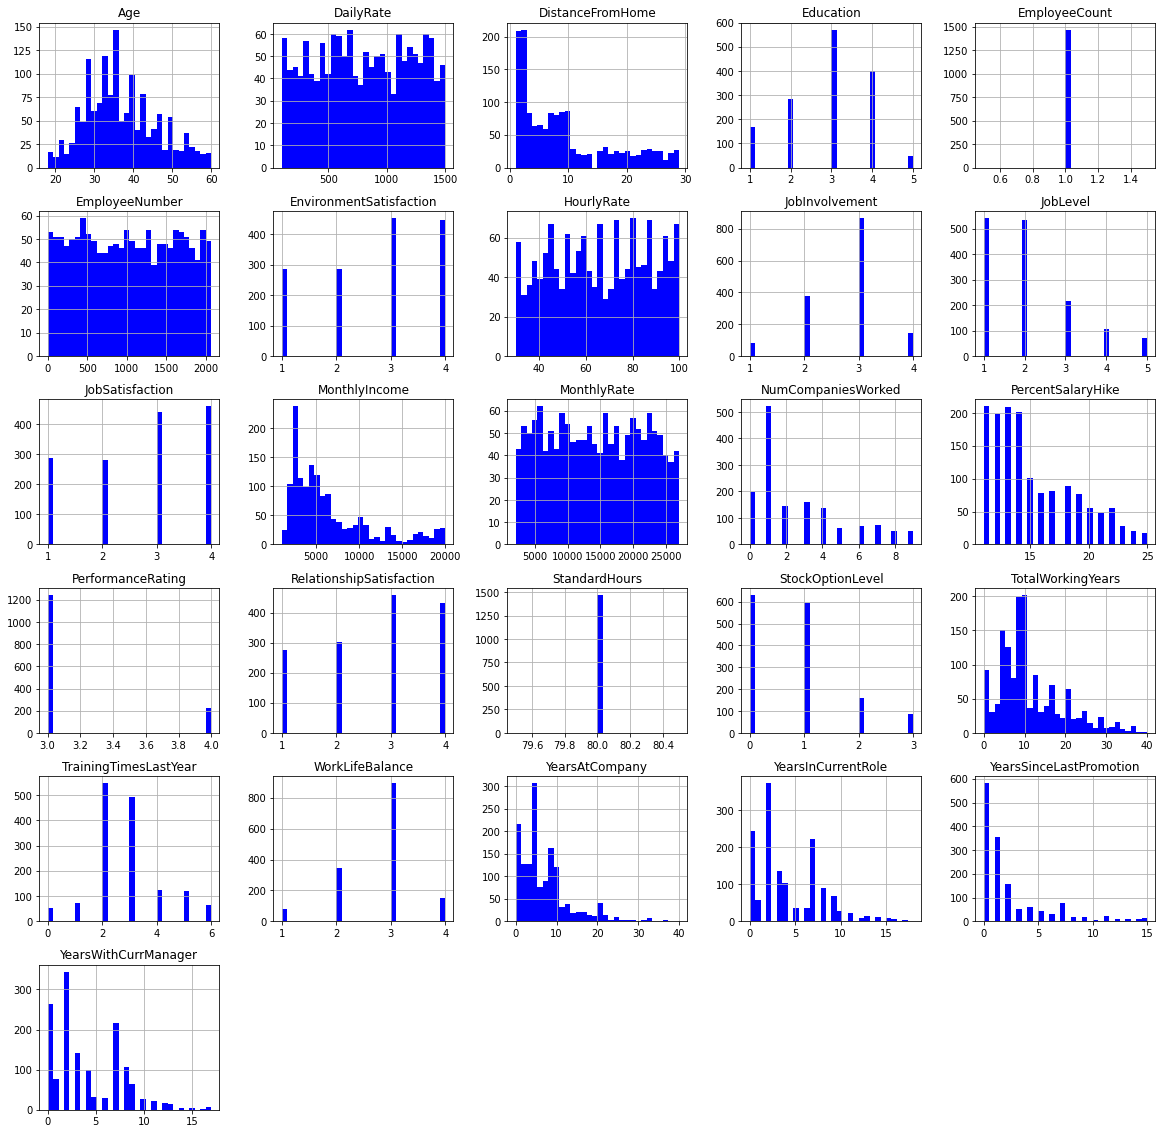

In [6]:
base.hist(bins = 30, figsize=(20,20), color = 'b');

In [7]:
base.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Algumas porcentagens rápidas

In [8]:
sairamColabs = base[base['Attrition'] == 'Yes']
ficaramColabs = base[base['Attrition'] == 'No']

In [9]:
print('Total = ', len(base))
print('Número de funcionários que saíram da empresa = ', len(sairamColabs))
print('Porcentagem de funcionários que saíram da empresa = ', (len(sairamColabs) / len(base)) * 100)
print('Número de funcionários que ficaram na empresa = ', len(ficaramColabs))
print('Porcentagem de funcionários que ficaram na empresa = ', (len(ficaramColabs) / len(base)) * 100)

Total =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


## **PRÉ-PROCESSAMENTO DOS DADOS**

Removendo valores NaN e Null

In [10]:
base.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
base.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Não foi aplicada nenhuma técnica de preparação para valores nulos ou ausentes pois a base não possui

## **HIPÓTESES LEVANTADAS E ANÁLISES EXPLORATÓRIAS**

Algumas hipóteses foram levantadas com o time de RH para tentar entender o fenômeno

H1 - Colaboradores que moram a mais de 15 km da empresa tem maior probabilidade de se desligar

H2 - Colaboradores que não foram promovidos nos ultimos 4 anos tem maior probabilidade de se desligar

H3 - Colaboradores mais jovens tem maior tendência a se desligar

H4 - Colaboradores que fazem mais horas extras tem maior probabilidade de se desligar

H5 - Colaboradores mais envolvidos com a empresa tem menor probabilidade de se desligar

**H1 - Colaboradores que moram a mais de 15 km da empresa tem maior probabilidade de se desligar** [VÁLIDA]

In [12]:
# dados em milhas na base 9 milhas = aproximadamente 15 km
maiorDist = len(base[(base['DistanceFromHome'] >= 9) & (base['Attrition'] == 'Yes')])
menorDist = len(base[(base['DistanceFromHome'] < 9) & (base['Attrition'] == 'Yes')])

In [13]:
# Função para adicionar rotulos em cada barra
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

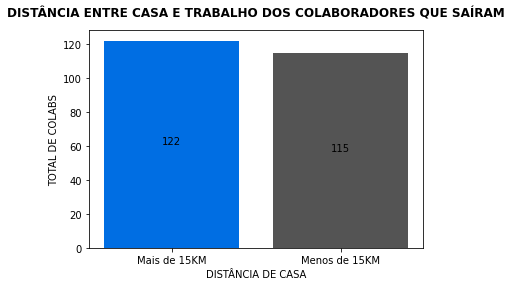

In [14]:
x = ['Mais de 15KM', 'Menos de 15KM']
y = [maiorDist, menorDist]
plt.title("DISTÂNCIA ENTRE CASA E TRABALHO DOS COLABORADORES QUE SAÍRAM", pad=14, fontweight="bold")
plt.xlabel("DISTÂNCIA DE CASA")
plt.ylabel("TOTAL DE COLABS")
addlabels(x, y)
plt.bar(x, y, color = ['#006EE3','#545454'])
plt.show()

**H2 - Colaboradores que não foram promovidos nos ultimos 4 anos tem maior probabilidade de se desligar**[INVÁLIDA]

In [15]:
linha = base[base['Attrition'] == 'Yes'].groupby('YearsSinceLastPromotion').count()

In [16]:
menos4 = len(base[(base['YearsSinceLastPromotion'] <= 4) & (base['Attrition'] == 'Yes')])
mais4 = len(base[(base['YearsSinceLastPromotion'] > 4) & (base['Attrition'] == 'Yes')])

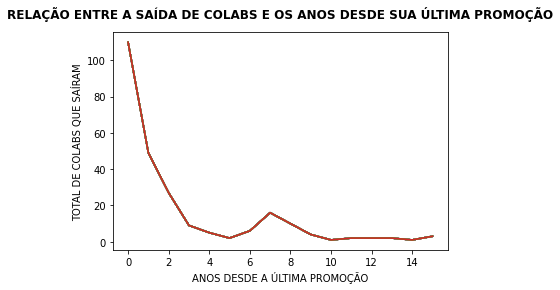

In [17]:
plt.title("RELAÇÃO ENTRE A SAÍDA DE COLABS E OS ANOS DESDE SUA ÚLTIMA PROMOÇÃO", pad=14, fontweight="bold")
plt.xlabel("ANOS DESDE A ÚLTIMA PROMOÇÃO")
plt.ylabel("TOTAL DE COLABS QUE SAÍRAM")
plt.plot(linha)
plt.show()

Vamos separar em dois grupos para ter uma noção mais detalhada do número de funcionários

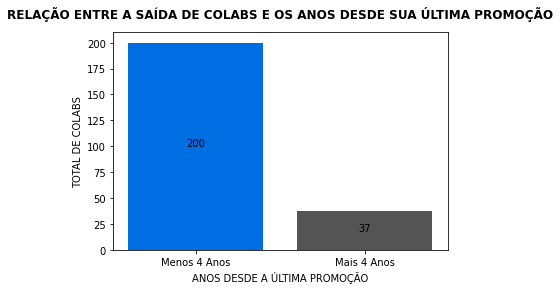

In [18]:
x = ['Menos 4 Anos', 'Mais 4 Anos']
y = [menos4, mais4]

plt.title("RELAÇÃO ENTRE A SAÍDA DE COLABS E OS ANOS DESDE SUA ÚLTIMA PROMOÇÃO", pad=14, fontweight="bold")
plt.xlabel("ANOS DESDE A ÚLTIMA PROMOÇÃO")
plt.ylabel("TOTAL DE COLABS")
addlabels(x, y)
plt.bar(x, y, color = ['#006EE3','#545454'])
plt.show()

**H3 - Colaboradores mais jovens(menos de 25 anos) tem maior tendência a se desligar** [INVÁLIDA]

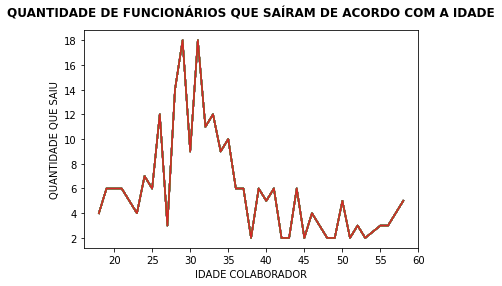

In [19]:
info = base[base['Attrition'] == 'Yes'].groupby('Age').count()

plt.title("QUANTIDADE DE FUNCIONÁRIOS QUE SAÍRAM DE ACORDO COM A IDADE", pad=14, fontweight="bold")
plt.xlabel("IDADE COLABORADOR")
plt.ylabel("QUANTIDADE QUE SAIU")
plt.plot(info)
plt.show()

**H4 - Colaboradores que fazem horas extras tem maior probabilidade de se desligar** [VÁLIDA]

In [20]:
comHoraExtra = len(base[(base['OverTime'] == 'Yes') & (base['Attrition'] == 'Yes')])
semHoraExtra = len(base[(base['OverTime'] == 'No') & (base['Attrition'] == 'Yes')])

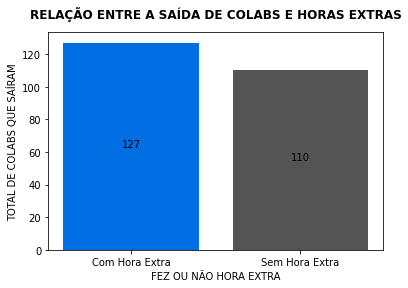

In [21]:
x = ['Com Hora Extra', 'Sem Hora Extra']
y = [comHoraExtra, semHoraExtra]
plt.title("RELAÇÃO ENTRE A SAÍDA DE COLABS E HORAS EXTRAS", pad=14, fontweight="bold")
plt.xlabel("FEZ OU NÃO HORA EXTRA")
plt.ylabel("TOTAL DE COLABS QUE SAÍRAM")
addlabels(x, y)
plt.bar(x, y, color = ['#006EE3','#545454'])
plt.show()

**H5 - Colaboradores mais envolvidos com a empresa tem menor probabilidade de se desligar**[INVÁLIDA]

In [22]:
pouco = len(base[(base['JobInvolvement'] == 1) & (base['Attrition'] == 'Yes')])
medio = len(base[(base['JobInvolvement'] == 2) & (base['Attrition'] == 'Yes')])
alto = len(base[(base['JobInvolvement'] == 3) & (base['Attrition'] == 'Yes')])
muitoAlto = len(base[(base['JobInvolvement'] == 4) & (base['Attrition'] == 'Yes')])

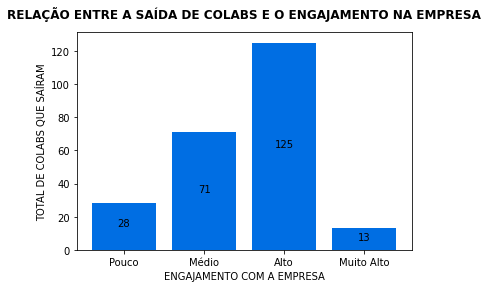

In [23]:
x = ['Pouco', 'Médio', 'Alto', 'Muito Alto']
y = [pouco, medio, alto, muitoAlto]
plt.title("RELAÇÃO ENTRE A SAÍDA DE COLABS E O ENGAJAMENTO NA EMPRESA", pad=14, fontweight="bold")
plt.xlabel("ENGAJAMENTO COM A EMPRESA")
plt.ylabel("TOTAL DE COLABS QUE SAÍRAM")
addlabels(x, y)
plt.bar(x, y, color = ['#006EE3'])
plt.show()

# **SOLUÇÃO PROPOSTA**

##**Importando as Bibliotecas**

In [24]:
# caso nao tenha essa biblioteca instalada
!pip install scikit-optimize

In [25]:
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, RandomizedSearchCV
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_absolute_error, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from skopt import gp_minimize
import warnings

In [26]:
warnings.simplefilter(action='ignore', category=FutureWarning)

##**Pré-Processamento dos Dados Para o Modelo de Machine Learning**

In [27]:
# Separando algumas colunas que não irão acrescentar ao modelo e gerarão ruído nos dados
base = base.drop(labels=['Age','Over18', 'EmployeeNumber', 'EmployeeCount', 'Gender', 'StandardHours', 'MaritalStatus', 'RelationshipSatisfaction'], axis=1)
base['Attrition'] = base['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
base['OverTime'] = base['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [28]:
# Separando as features da classe alvo que queremos prever
x = base.drop('Attrition', axis=1)
y = base['Attrition']

In [29]:
x.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,94,3,2,Sales Executive,4,5993,19479,8,1,11,3,0,8,0,1,6,4,0,5
1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,61,2,2,Research Scientist,2,5130,24907,1,0,23,4,1,10,3,3,10,7,1,7
2,Travel_Rarely,1373,Research & Development,2,2,Other,4,92,2,1,Laboratory Technician,3,2090,2396,6,1,15,3,0,7,3,3,0,0,0,0
3,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,56,3,1,Research Scientist,3,2909,23159,1,1,11,3,0,8,3,3,8,7,3,0
4,Travel_Rarely,591,Research & Development,2,1,Medical,1,40,3,1,Laboratory Technician,2,3468,16632,9,0,12,3,1,6,3,3,2,2,2,2


In [30]:
# Irei aplicar o OneHotEnconder na features categoricas da base ele transforma cada categoria da variavel em uma nova coluna e preenche a linha com 0 ou 1 dependendo se o registro possui ou não a categoria
# teria a opção de usar o label encoder que transforma o texto categorico em 1 numero sendo 1 numero diferentes (1,2,3...) para cada texto distinto mas o algoritmo na hora da aprendizagem pode levar essa
# ordem em consideração o que não representa a realidade nesse caso

# LabelEncoder: variaveis categoricas que possuem uma ordem (ordinais)/ OneHotEncoder variaveis categoricas sem uma ordem (nominais)
x_Categorico = x[['BusinessTravel', 'Department', 'EducationField', 'JobRole']]

In [31]:
hotEnconder = OneHotEncoder()
x_Categorico = hotEnconder.fit_transform(x_Categorico).toarray()
colunas = hotEnconder.get_feature_names(['BusinessTravel', 'Department', 'EducationField', 'JobRole'])

In [32]:
x_Categorico = pd.DataFrame(x_Categorico, columns= colunas)

In [33]:
x_Numerico = x[['DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction', 'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

In [34]:
xAll = pd.concat([x_Categorico, x_Numerico], axis=1)

**Verificando o Balanceamento das classes Alvo**

In [35]:
# Foram Feitos Testes com a base de dados desbalanceada mas os valores de Recall para a classe alvo 1 (Quando o colaborador sai da empresa) estavam muito baixos entre 0.32 e 0.41
# Então optou-se por balancear as classes utilizando o algoritmo SMOTE de oversampling que gera sinteticamento novos registros automaticamente 

In [36]:
smote = SMOTE(sampling_strategy='minority')
x_Over, y_Over = smote.fit_resample(xAll, y)

##**Selecionando Dados de Treinamento, Validação e Teste**

Para evitar problemas com Overfiting (quando o modelo decora os dados e não aprende realmente com eles) irei separar os dados em duas grandes partições Treino e Teste e na partição de Treino por sua vez será dividido um novo conjunto para Validação 

In [37]:
# Usando Holdout separando 20% dos dados para teste
x_Val_Train, x_Test, y_Val_Train, y_Test = train_test_split(x_Over, y_Over, test_size=0.2)

In [38]:
# Dos 80% separados para Treino vamos separar 20% para Validação
x_Train, x_Validation, y_Train, y_Validation = train_test_split(x_Val_Train, y_Val_Train, test_size=0.2)

In [39]:
# Definindo a escala
col_Val_Train = x_Val_Train.columns
col_Train = x_Train.columns
col_Test = x_Test.columns

scaler = StandardScaler()
x_Val_Train = pd.DataFrame(scaler.fit_transform(x_Val_Train), columns=col_Val_Train)
x_Train = pd.DataFrame(scaler.fit_transform(x_Train), columns=col_Train)
x_Test = pd.DataFrame(scaler.fit_transform(x_Test), columns=col_Test)

##**Construção Dos Modelos**

**Criando os Pipelines**

Pipelines são Fluxos de trabalho, que nos ajudam a aumatizar as etapas da construção de um algoritmo de machine learning, no projeto utilizarei para testar vários algoritmos em paralelo e escolher 2 com melhores resultados para prosseguir

In [40]:
# Criando modelo de Machine Learning a partir de cada algoritmo
# Os dados estão em diferentes escalas e isso pode prejudicar a performance de alguns algoritmos.
# Vamos aplicar a  Padronização ao conjunto de dados (colocando-os na mesma escala).
# Nesta técnica, os dados serão transformados de modo que estejam com uma distribuição normal, com média igual a zero e
# desvio padrão igual a 1.

pipelines = []
pipelines.append(('scaledLR', Pipeline([('scaler', StandardScaler()),('lr', LogisticRegression())])))
pipelines.append(('scaledTree', Pipeline([('scaler', StandardScaler()),('tree', DecisionTreeClassifier())])))
pipelines.append(('scaledKnn', Pipeline([('scaler', StandardScaler()),('knn', KNeighborsClassifier())])))
pipelines.append(('scaledRandom', Pipeline([('scaler', StandardScaler()),('randomF', RandomForestClassifier())])))
pipelines.append(('scaledNaive', Pipeline([('scaler', StandardScaler()),('naive', GaussianNB())])))

In [41]:
# Percorrer os modelos e Exibir as Três principais métricas

resultados = []
nomes = []

for nome, modelo in pipelines:
  kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=7)
  crossResultados = model_selection.cross_validate(modelo, x_Val_Train, y_Val_Train, cv=kfold, scoring=('precision', 'recall', 'accuracy'), return_train_score=True)
  resultados.append(crossResultados)
  nomes.append(nome)
  avaliacao = "%s: Accuracy(%.3f) Precision(%.3f) Recall(%.3f) " % (nome, crossResultados['test_accuracy'].mean(), crossResultados['test_precision'].mean(), crossResultados['test_recall'].mean())
  print(avaliacao)

scaledLR: Accuracy(0.825) Precision(0.819) Recall(0.839) 
scaledTree: Accuracy(0.827) Precision(0.812) Recall(0.855) 
scaledKnn: Accuracy(0.841) Precision(0.774) Recall(0.967) 
scaledRandom: Accuracy(0.920) Precision(0.961) Recall(0.876) 
scaledNaive: Accuracy(0.722) Precision(0.677) Recall(0.857) 


**Tunning dos Modelos**

Tunning do Random Forest

In [42]:
# Possíveis valores de estimators
val_Estimators = [100, 150, 200, 250, 300]
# Possíveis valores para o critério de divisão
val_Criterion = ['gini', 'entropy']
# Possíveis valores para a divisão de novas folhas
val_Leafs = [5, 10, 20, 50, 100]

# Definindo um dicionário que recebe as listas de parâmetros e valores
parametros_grid = dict(n_estimators = val_Estimators, min_samples_leaf = val_Leafs, criterion = val_Criterion)

randomF = RandomForestClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=7)

# Testando diferenets combinações com os parâmetros
grid = RandomizedSearchCV(estimator = randomF, param_distributions = parametros_grid, cv = kfold, scoring = 'recall')
grid.fit(x_Train, y_Train)

# Print do resultado
print("Grid Scores Random Forest:")
means = grid.cv_results_['mean_test_score'].round(5)

for mean, params in zip(means, grid.cv_results_['params']):
    print(f'mean:{mean},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

# Melhor parâmetro:{'n_estimators': 250, 'min_samples_leaf': 5, 'criterion': 'entropy'}, Score:0.8725474683544304

Grid Scores Random Forest:
mean:0.87203,params:{'n_estimators': 300, 'min_samples_leaf': 5, 'criterion': 'gini'}
mean:0.85703,params:{'n_estimators': 100, 'min_samples_leaf': 20, 'criterion': 'gini'}
mean:0.86579,params:{'n_estimators': 300, 'min_samples_leaf': 10, 'criterion': 'entropy'}
mean:0.84448,params:{'n_estimators': 100, 'min_samples_leaf': 50, 'criterion': 'gini'}
mean:0.86828,params:{'n_estimators': 200, 'min_samples_leaf': 10, 'criterion': 'entropy'}
mean:0.86331,params:{'n_estimators': 250, 'min_samples_leaf': 10, 'criterion': 'gini'}
mean:0.85199,params:{'n_estimators': 300, 'min_samples_leaf': 20, 'criterion': 'gini'}
mean:0.84824,params:{'n_estimators': 250, 'min_samples_leaf': 50, 'criterion': 'entropy'}
mean:0.8382,params:{'n_estimators': 200, 'min_samples_leaf': 50, 'criterion': 'gini'}
mean:0.85573,params:{'n_estimators': 250, 'min_samples_leaf': 20, 'criterion': 'entropy'}

Melhor parâmetro:{'n_estimators': 300, 'min_samples_leaf': 5, 'criterion': 'gini'}, Score:0.

Tunning Regressão Logistica

In [43]:
# Possíveis valores de estimators
val_C = np.logspace(0.5, 8, 15)
# Possíveis valores para o critério de divisão
val_Penalty = ['l1', 'l2']

# Definindo um dicionário que recebe as listas de parâmetros e valores
parametros_grid = dict(penalty = val_Penalty, C = val_C)

LR = LogisticRegression(max_iter=10000)

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=7)

# Testando diferenets combinações com os parâmetros
grid = RandomizedSearchCV(estimator = LR, param_distributions = parametros_grid, cv = kfold, scoring = 'recall')
grid.fit(x_Train, y_Train)

# Print do resultado
print("Grid Scores Logistic Regression:")
means = grid.cv_results_['mean_test_score'].round(5)

for mean, params in zip(means, grid.cv_results_['params']):
    print(f'mean:{mean},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

# Melhor parâmetro:{'penalty': 'l2', 'C': 209617.9992}, Score:0.0.8358

Grid Scores Logistic Regression:
mean:nan,params:{'penalty': 'l1', 'C': 61054.02296585326}
mean:0.84187,params:{'penalty': 'l2', 'C': 10.857111194022039}
mean:0.84187,params:{'penalty': 'l2', 'C': 61054.02296585326}
mean:nan,params:{'penalty': 'l1', 'C': 209617.99924531256}
mean:0.84187,params:{'penalty': 'l2', 'C': 1508.5907086001778}
mean:0.84187,params:{'penalty': 'l2', 'C': 8483428.982440725}
mean:nan,params:{'penalty': 'l1', 'C': 1508.5907086001778}
mean:nan,params:{'penalty': 'l1', 'C': 10.857111194022039}
mean:nan,params:{'penalty': 'l1', 'C': 2470911.227985602}
mean:nan,params:{'penalty': 'l1', 'C': 719685.6730011514}

Melhor parâmetro:{'penalty': 'l2', 'C': 10.857111194022039}, Score:0.841867088607595


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

**Feature Selection**

Nesse caso optei a feature selection após comparar os modelos usando algoritmos diferentes, pois cada algoritmo tem sua particularidade de funcionamento e trabalhará melhor com features diferentes um do outro (isso foi possível pois a amostra de dados é relativamente pequena e não demanda tanto tempo e custo computacional)

In [44]:
LR = LogisticRegression(max_iter=10000, penalty='l2', C=209617.9992)
randomF = RandomForestClassifier(n_estimators=150, min_samples_leaf=5, criterion='entropy')

In [45]:
# usando Random
k_vs_score = []

for k in range(2, 44, 2):
  selector = SelectKBest(score_func=f_classif, k=k)

  x_Train2 = selector.fit_transform(x_Train, y_Train)
  x_Validation2 = selector.transform(x_Validation)

  randomF.fit(x_Train2, y_Train)
  randomF_Predict = randomF.predict(x_Validation2)

  score = mean_absolute_error(y_Validation, randomF_Predict)
  avaliacao = "K= %d - MAE: %.3f" % (k, score)
  print(avaliacao)
  k_vs_score.append(score)

K= 2 - MAE: 0.494
K= 4 - MAE: 0.494
K= 6 - MAE: 0.494
K= 8 - MAE: 0.494
K= 10 - MAE: 0.494
K= 12 - MAE: 0.494
K= 14 - MAE: 0.494
K= 16 - MAE: 0.494
K= 18 - MAE: 0.494
K= 20 - MAE: 0.494
K= 22 - MAE: 0.494
K= 24 - MAE: 0.494
K= 26 - MAE: 0.494
K= 28 - MAE: 0.494
K= 30 - MAE: 0.468
K= 32 - MAE: 0.489
K= 34 - MAE: 0.494
K= 36 - MAE: 0.375
K= 38 - MAE: 0.438
K= 40 - MAE: 0.468
K= 42 - MAE: 0.471


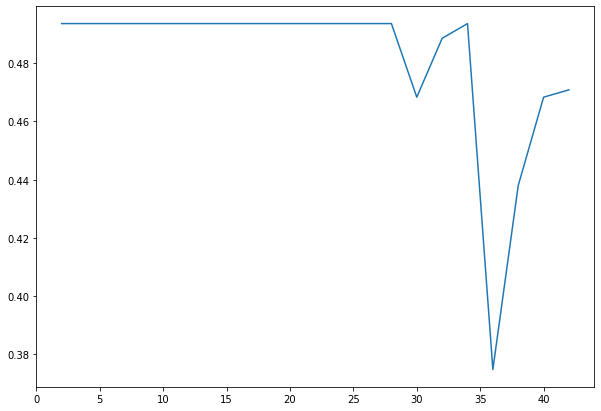

In [46]:
pd.Series(k_vs_score, index=range(2, 44, 2)).plot(figsize=(10, 7));

In [62]:
selector = SelectKBest(score_func=f_classif, k=35)
selector.fit(x_Train, y_Train)

SelectKBest(k=35)

In [48]:
mask = selector.get_support()
x_Train_RandomF = x_Val_Train.iloc[:, mask]
x_Test_RandomF = x_Test.iloc[:, mask]

In [49]:
# usando Logistic Regression
k_vs_score = []

for k in range(2, 44, 2):
  selector = SelectKBest(score_func=f_classif, k=k)

  x_Train2 = selector.fit_transform(x_Train, y_Train)
  x_Validation2 = selector.transform(x_Validation)

  LR.fit(x_Train2, y_Train)
  LR_Predict = LR.predict(x_Validation2)

  score = mean_absolute_error(y_Validation, LR_Predict)
  avaliacao = "K= %d - MAE: %.3f" % (k, score)
  print(avaliacao)
  k_vs_score.append(score)

K= 2 - MAE: 0.494
K= 4 - MAE: 0.494
K= 6 - MAE: 0.494
K= 8 - MAE: 0.494
K= 10 - MAE: 0.506
K= 12 - MAE: 0.506
K= 14 - MAE: 0.506
K= 16 - MAE: 0.506
K= 18 - MAE: 0.506
K= 20 - MAE: 0.506
K= 22 - MAE: 0.506
K= 24 - MAE: 0.506
K= 26 - MAE: 0.506
K= 28 - MAE: 0.506
K= 30 - MAE: 0.506
K= 32 - MAE: 0.506
K= 34 - MAE: 0.506
K= 36 - MAE: 0.506
K= 38 - MAE: 0.506
K= 40 - MAE: 0.572
K= 42 - MAE: 0.575


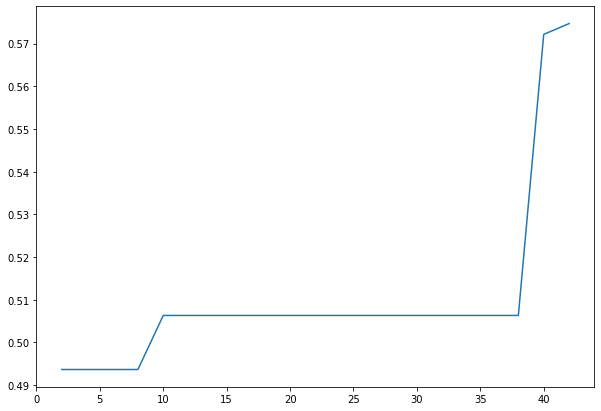

In [50]:
pd.Series(k_vs_score, index=range(2, 44, 2)).plot(figsize=(10, 7));

In [51]:
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(x_Train, y_Train)

SelectKBest()

In [52]:
mask = selector.get_support()
x_Train_LR = x_Val_Train.iloc[:, mask]
x_Test_LR = x_Test.iloc[:, mask]

**Treinando e Comparando as Versões Finais dos Modelos**

In [63]:
randomF = RandomForestClassifier(n_estimators=150, min_samples_leaf=5, criterion='entropy')
randomF.fit(x_Train_RandomF, y_Val_Train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       n_estimators=150)

In [64]:
randomF_Predict = randomF.predict(x_Test_RandomF)

In [65]:
accuracyR = accuracy_score(y_Test, randomF_Predict)
precisionR = precision_score(y_Test, randomF_Predict)
recallR = recall_score(y_Test, randomF_Predict)
avaliacaoRandomF = "Scores Random Forest: Acurracy: %.3f Precision: %.3f Recall: %.3f" % (accuracyR,precisionR,recallR)
cmR = classification_report(y_Test, randomF_Predict)

In [56]:
LR = LogisticRegression(max_iter=10000, penalty='l2', C=127.9802)
LR.fit(x_Train_LR, y_Val_Train)

LogisticRegression(C=127.9802, max_iter=10000)

In [57]:
LR_Predict = LR.predict(x_Test_LR)

In [58]:
accuracyLR = accuracy_score(y_Test, LR_Predict)
precisionLR = precision_score(y_Test, LR_Predict)
recallLR = recall_score(y_Test, LR_Predict)
avaliacaoLR = "Scores Logistic Regression: Acurracy: %.3f Precision: %.3f Recall: %.3f" % (accuracyLR,precisionLR,recallLR)
cmLR = classification_report(y_Test, LR_Predict)

**Avaliando os Resultados:**

In [66]:
print("Random Forest:")
print(avaliacaoRandomF)
print(cmR)
print("--------------------------------------")
print("Logistic Regression:")
print(avaliacaoLR)
print(cmLR)

Random Forest:
Scores Random Forest: Acurracy: 0.848 Precision: 0.779 Recall: 0.963
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       253
           1       0.78      0.96      0.86       241

    accuracy                           0.85       494
   macro avg       0.87      0.85      0.85       494
weighted avg       0.87      0.85      0.85       494

--------------------------------------
Logistic Regression:
Scores Logistic Regression: Acurracy: 0.765 Precision: 0.751 Recall: 0.776
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       253
           1       0.75      0.78      0.76       241

    accuracy                           0.77       494
   macro avg       0.77      0.77      0.77       494
weighted avg       0.77      0.77      0.77       494



O **Random Forest** apresentou melhores resultados sendo assim o modelo **Escolhido e Salvo**

In [60]:
# importando a biblioteca para salvar o modelo em disco
import pickle

In [61]:
# salvando o modelo e as variaveis necessárias no arquivo .pkl
with open('modelo.pkl', 'wb') as f:
  pickle.dump([scaler, hotEnconder, randomF], f)